In [297]:
import urllib, json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## NYSERDA Solar Installation Data

In [298]:
#Includes Tract Numbers from NY Census Geo 
solar_instal = pd.read_csv('serda_tract.csv')

In [299]:
solar_instal.head()

,X,Y,Index,Reporting_Period,Project_Number,City,County,State,Zip_Code,Sector,...,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10
0,-73.914148,42.225955,0,7/31/17,4704-46572,Catskill,Greene,NY,12414,Residential,...,81102,36039081102,811.02,Census Tract 811.02,G5020,S,61294351,5265390,42.191093,-73.916360
1,-74.031420,42.426414,1,7/31/17,4704-42684,Greenville,Greene,NY,12083,Residential,...,80201,36039080201,802.01,Census Tract 802.01,G5020,S,100460848,766062,42.397012,-74.014683
2,-73.081448,40.871411,2,7/31/17,4704-45656,Centereach,Suffolk,NY,11720,Residential,...,158104,36103158104,1581.04,Census Tract 1581.04,G5020,S,3453187,0,40.871863,-73.080949
3,-73.854217,43.004269,3,7/31/17,4704-44415,Ballston Spa,Saratoga,NY,12020,Residential,...,61800,36091061800,618.00,Census Tract 618,G5020,S,4435642,23918,43.005640,-73.854458
4,-73.836873,41.385975,4,7/31/17,4704-46152,Putnam Valley,Putnam,NY,10579,Residential,...,10900,36079010900,109.00,Census Tract 109,G5020,S,33738780,2073069,41.368082,-73.862046


In [300]:
solar_instal.columns

Index([u'X', u'Y', u'Index', u'Reporting_Period', u'Project_Number', u'City',
       u'County', u'State', u'Zip_Code', u'Sector', u'Program_Type',
       u'Solicitation', u'Electric_Utility', u'Purchase_Type',
       u'Date_Application_Received', u'Date_Completed', u'Project_Status',
       u'Contractor', u'Primary_Inverter_Manufacturer',
       u'Total_Inverter_Quantity', u'Primary_Inverter_Model_Number',
       u'Primary_PV_Module_Manufacturer', u'Total_PV_Module_Quantity',
       u'PV_Module_Model_Number', u'Project_Cost', u'$Incentive',
       u'Total_Nameplate_kW_DC', u'Expected_KWh_Annual_Production',
       u'Remote_Net_Metering', u'Affordable_Solar',
       u'Community_Distributed_Generation',
       u'Green_Jobs_Green_New_York_Participant', u'Location_1',
       u'('county', 'lat_lon')', u'county_1', u'state_1', u'lat_lon', u'other',
       u'lat', u'lon', u'STATEFP10', u'COUNTYFP10', u'TRACTCE10', u'GEOID10',
       u'NAME10', u'NAMELSAD10', u'MTFCC10', u'FUNCSTAT10', u'ALAND

In [301]:
solar_instal['Project_Cost'] = solar_instal['Project_Cost'].str.replace('$', '')
solar_instal['Project_Cost'] = solar_instal['Project_Cost'].str.replace(' ', '')
solar_instal['Project_Cost'] = solar_instal['Project_Cost'].str.replace(',', '')
solar_instal['Project_Cost'] = pd.to_numeric(solar_instal['Project_Cost'])

In [302]:
solar_instal['GEOID10'].head()

0    36039081102
1    36039080201
2    36103158104
3    36091061800
4    36079010900
Name: GEOID10, dtype: int64

In [303]:
solar_instal['Tract'] = solar_instal['GEOID10'].astype(str).str[5:]

In [304]:
solar_instal['Tract'].head()

0    081102
1    080201
2    158104
3    061800
4    010900
Name: Tract, dtype: object

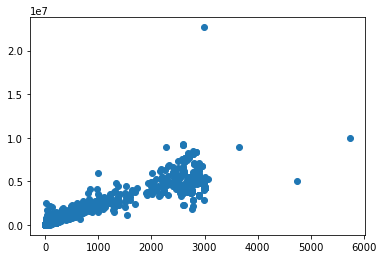

In [306]:
plt.scatter(solar_instal['Total_Nameplate_kW_DC'], solar_instal['Project_Cost'])

In [307]:
np.mean(solar_instal['Total_Nameplate_kW_DC'])

26.302154293663346

In [308]:
solar_instal['cost_Kw']=solar_instal['Project_Cost']/solar_instal['Total_Nameplate_kW_DC']

In [309]:
solar_instal['Date_Completed1']= pd.to_datetime(solar_instal['Date_Completed'])

In [310]:
solar_instal.sort_values('Date_Completed1', axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')

(0, 50000)

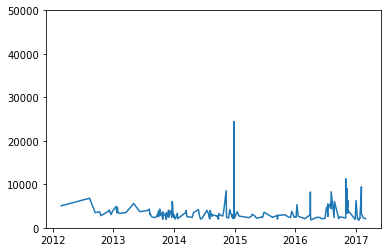

In [180]:
temp = solar_instal[solar_instal['Date_Completed1']>'01/01/1999']
df = temp[temp['Program_Type']=='Commercial/Industrial (Competitive)']
fig, ax = plt.subplots()
ax.plot(df['Date_Completed1'], df['cost_Kw'])
ax.set_ylim(0,50000)

(0, 50000)

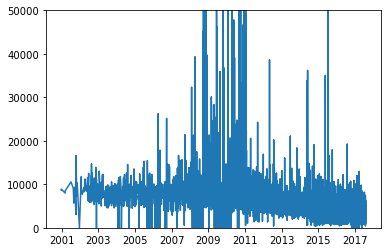

In [181]:
df = temp[temp['Program_Type']=='Residential/Small Commercial']
fig, ax = plt.subplots()
ax.plot(df['Date_Completed1'], df['cost_Kw'])
ax.set_ylim(0,50000)

In [182]:
#Avg. size of installation per use 
pd.pivot_table(solar_instal, values="Total_Nameplate_kW_DC", index='Sector', columns='Program_Type')

Program_Type,Commercial/Industrial (Competitive),Commercial/Industrial (MW Block),Residential/Small Commercial
Sector,,,
Non-Residential,989.847836,2200.554826,48.228669
Residential,NaN,NaN,7.506302


In [183]:
pd.pivot_table(solar_instal, values="Total_Nameplate_kW_DC", index='Sector', columns='Program_Type', aggfunc=len)

Program_Type,Commercial/Industrial (Competitive),Commercial/Industrial (MW Block),Residential/Small Commercial
Sector,,,
Non-Residential,268.0,460.0,5258.0
Residential,NaN,NaN,73084.0


In [184]:
temp2 = pd.pivot_table(solar_instal, values="cost_Kw", index='Contractor', columns='State')
temp2

State,NY
Contractor,
"0821 ABC, Inc",7050.000000
123 HOME IMPROVEMENTS INC,3836.317136
1st Light Energy,4953.395205
2K Solar Contracting,6205.069402
3rd Rock Systems & Technologies,8075.370121
A&B HOME IMPROVEMENT CO,6758.448060
A-Best Energy Power,6272.403773
A.C.E. INC,3739.316239
ABEST ENERGY POWER,4125.472751


In [185]:
pd.pivot_table(solar_instal, values="Total_Nameplate_kW_DC", index='Contractor', columns='State')

State,NY
Contractor,
"0821 ABC, Inc",10.000000
123 HOME IMPROVEMENTS INC,3.910000
1st Light Energy,6.880103
2K Solar Contracting,7.428437
3rd Rock Systems & Technologies,7.430000
A&B HOME IMPROVEMENT CO,7.990000
A-Best Energy Power,14.975435
A.C.E. INC,9.360000
ABEST ENERGY POWER,12.840556


In [186]:
pd.pivot_table(solar_instal, values="Total_Nameplate_kW_DC", index='Contractor', columns='State', aggfunc=len)

State,NY
Contractor,
"0821 ABC, Inc",1.0
123 HOME IMPROVEMENTS INC,1.0
1st Light Energy,877.0
2K Solar Contracting,32.0
3rd Rock Systems & Technologies,1.0
A&B HOME IMPROVEMENT CO,1.0
A-Best Energy Power,46.0
A.C.E. INC,1.0
ABEST ENERGY POWER,18.0


In [187]:
pd.pivot_table(solar_instal, values="Total_Nameplate_kW_DC", index='Purchase_Type', columns='Program_Type', aggfunc=len)

Program_Type,Commercial/Industrial (Competitive),Commercial/Industrial (MW Block),Residential/Small Commercial
Purchase_Type,,,
Lease,3.0,81.0,29398.0
Power Purchase Agreement,134.0,313.0,10856.0
Purchase,107.0,66.0,33004.0


In [188]:
pd.pivot_table(solar_instal, values="Total_Nameplate_kW_DC", index='Purchase_Type', columns='Program_Type')

Program_Type,Commercial/Industrial (Competitive),Commercial/Industrial (MW Block),Residential/Small Commercial
Purchase_Type,,,
Lease,912.490000,2725.590988,7.467099
Power Purchase Agreement,1533.700000,2236.141502,14.435789
Purchase,482.975327,1387.425152,11.164040


In [190]:
median_income.columns

Index([u'GEO.id', u'GEO.id2', u'GEO.display-label', u'HC01_EST_VC02',
       u'HC01_MOE_VC02', u'HC02_EST_VC02', u'HC02_MOE_VC02', u'HC01_EST_VC04',
       u'HC01_MOE_VC04', u'HC02_EST_VC04',
       ...
       u'HC02_EST_VC39', u'HC02_MOE_VC39', u'HC01_EST_VC40', u'HC01_MOE_VC40',
       u'HC02_EST_VC40', u'HC02_MOE_VC40', u'HC01_EST_VC41', u'HC01_MOE_VC41',
       u'HC02_EST_VC41', u'HC02_MOE_VC41'],
      dtype='object', length=123)

In [191]:
median_income=pd.read_csv('income_data/ACS_15_5YR_S1903_with_ann.csv')

In [220]:
median_income.columns

Index([u'GEO.id', u'GEO.id2', u'GEO.display-label', u'HC01_EST_VC02',
       u'HC01_MOE_VC02', u'HC02_EST_VC02', u'HC02_MOE_VC02', u'HC01_EST_VC04',
       u'HC01_MOE_VC04', u'HC02_EST_VC04',
       ...
       u'HC02_EST_VC39', u'HC02_MOE_VC39', u'HC01_EST_VC40', u'HC01_MOE_VC40',
       u'HC02_EST_VC40', u'HC02_MOE_VC40', u'HC01_EST_VC41', u'HC01_MOE_VC41',
       u'HC02_EST_VC41', u'HC02_MOE_VC41'],
      dtype='object', length=123)

In [221]:
solar_instal.columns

Index([u'X', u'Y', u'Index', u'Reporting_Period', u'Project_Number', u'City',
       u'County', u'State', u'Zip_Code', u'Sector', u'Program_Type',
       u'Solicitation', u'Electric_Utility', u'Purchase_Type',
       u'Date_Application_Received', u'Date_Completed', u'Project_Status',
       u'Contractor', u'Primary_Inverter_Manufacturer',
       u'Total_Inverter_Quantity', u'Primary_Inverter_Model_Number',
       u'Primary_PV_Module_Manufacturer', u'Total_PV_Module_Quantity',
       u'PV_Module_Model_Number', u'Project_Cost', u'$Incentive',
       u'Total_Nameplate_kW_DC', u'Expected_KWh_Annual_Production',
       u'Remote_Net_Metering', u'Affordable_Solar',
       u'Community_Distributed_Generation',
       u'Green_Jobs_Green_New_York_Participant', u'Location_1',
       u'('county', 'lat_lon')', u'county_1', u'state_1', u'lat_lon', u'other',
       u'lat', u'lon', u'STATEFP10', u'COUNTYFP10', u'TRACTCE10', u'GEOID10',
       u'NAME10', u'NAMELSAD10', u'MTFCC10', u'FUNCSTAT10', u'ALAND

In [222]:
solar_instal['GEO.id2'].dtype

dtype('int64')

In [214]:
median_income = median_income.iloc[1:]

In [225]:
median_income['GEO.id2'] = pd.to_numeric(median_income['GEO.id2'])

In [226]:
solar_instal['GEO.id2'].dtype

dtype('int64')

In [235]:
solar_instal['GEO.id2'].head()

57617    3609106250
30814    3601910180
29638    3608103580
30730    3608501050
26957    3607901060
Name: GEO.id2, dtype: int64

In [234]:
median_income['GEO.id2'].dtype

dtype('int64')

In [278]:
median_income['GEO.id2'].head(100)

1      3600101000
2      3600106211
3      3600106354
4      3600116694
5      3600116749
6      3600117343
7      3600130532
8      3600131104
9      3600140002
10     3600150672
11     3600161181
12     3600178674
13     3600179851
14     3600301209
15     3600301319
16     3600301429
17     3600301451
18     3600302011
19     3600302154
20     3600302187
21     3600305573
22     3600306717
23     3600307201
24     3600311253
25     3600312243
26     3600313475
27     3600315990
28     3600319367
29     3600327705
30     3600328563
          ...    
71     3600924031
72     3600925340
73     3600927342
74     3600927441
75     3600930257
76     3600934946
77     3600936123
78     3600937825
79     3600941982
80     3600942840
81     3600943896
82     3600944237
83     3600945161
84     3600949462
85     3600949880
86     3600954523
87     3600954716
88     3600954727
89     3600955783
90     3600957298
91     3600957331
92     3600959509
93     3600960587
94     3600960950
95     360

In [277]:
solar_instal['GEO.id2'].head(100)

57617    3609106250
30814    3601910180
29638    3608103580
30730    3608501050
26957    3607901060
30648    3608502730
30556    3607101140
29696    3608102580
29164    3608501050
24253    3604701510
30432    3608500640
29789    3608502130
29830    3608502730
25697    3600504260
25098    3608501460
27000    3605500540
29854    3608502130
28591    3611508700
29861    3608502730
28068    3609106110
30856    3608501700
26571    3602100040
26936    3604706880
29076    3608501700
27960    3608103340
29511    3600503500
31457    3610196110
26888    3607101450
29548    3608501700
29559    3604702490
            ...    
11410    3609574040
28927    3608111750
29631    3604705740
28755    3601303590
29273    3604706880
26724    3604707420
30287    3604709660
28853    3608502080
47671    3609303310
31184    3608105260
30972    3608102580
26389    3610595040
28903    3605501350
29973    3608114170
29927    3608105580
20404    3611900200
11831    3610314560
28843    3608108920
28223    3608103610


In [275]:
for i in solar_instal['GEO.id2']:
    for j in median_income['GEO.id2']:
        if j==i:
            print i

KeyboardInterrupt: 

In [231]:
merged = pd.merge(solar_instal, median_income, on='GEO.id2', how='outer')

In [232]:
merged.shape

(79070, 177)

In [218]:
solar_instal.shape

(79070, 55)

In [219]:
median_income.shape

(1023, 123)

In [233]:
merged[merged.notnull().any(axis=1)]


,X,Y,Index,Reporting_Period,Project_Number,City,County,State,Zip_Code,Sector,...,HC02_EST_VC39,HC02_MOE_VC39,HC01_EST_VC40,HC01_MOE_VC40,HC02_EST_VC40,HC02_MOE_VC40,HC01_EST_VC41,HC01_MOE_VC41,HC02_EST_VC41,HC02_MOE_VC41
0,-73.791645,42.926839,57620,7/31/17,4548-56294,Round Lake,Saratoga,NY,12151,Non-Residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-73.814461,44.647026,30817,7/31/17,91305,Saranac,Clinton,NY,12981,Residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-73.750319,40.672267,29641,7/31/17,89339,Jamaica,Queens,NY,11413,Residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-74.115757,40.632051,30733,7/31/17,91427,Staten Island,Richmond,NY,10310,Residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-73.917544,41.449844,26960,7/31/17,80460,Garrison,Putnam,NY,10516,Residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-74.152798,40.604049,30651,7/31/17,90727,Staten Island,Richmond,NY,10314,Residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-74.454318,41.447563,30559,7/31/17,90931,Middletown,Orange,NY,10940,Residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-73.787795,40.697789,29699,7/31/17,88760,Queens,Queens,NY,11433,Residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-74.115757,40.632051,29167,7/31/17,83991,Staten Island,Richmond,NY,10310,Residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-73.982561,40.666202,24256,7/31/17,73753,Brooklyn,Kings,NY,11215,Non-Residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
merged['GEO.id2']

0        3.60391e+09
1        3.60391e+09
2        3.60391e+09
3        3.60391e+09
4        3.60391e+09
5        3.60391e+09
6        3.60391e+09
7        3.60391e+09
8        3.60391e+09
9        3.60391e+09
10       3.60391e+09
11       3.60391e+09
12       3.60391e+09
13       3.60391e+09
14       3.60391e+09
15       3.60391e+09
16       3.60391e+09
17       3.60391e+09
18       3.60391e+09
19       3.60391e+09
20       3.60391e+09
21       3.60391e+09
22       3.60391e+09
23       3.60391e+09
24       3.60391e+09
25       3.60391e+09
26       3.60391e+09
27       3.60391e+09
28       3.60391e+09
29       3.60391e+09
            ...     
80064     3611965442
80065     3611968308
80066     3611981677
80067     3611984000
80068     3611984077
80069     3612102418
80070     3612103012
80071     3612105936
80072     3612112782
80073     3612118696
80074     3612121369
80075     3612127980
80076     3612128596
80077     3612138341
80078     3612146877
80079     3612155222
80080     361